# Data Exploration
___

We explore the dataset before training algorithms. 

In [2]:
# imports
import pandas as pd
import numpy as np
import zat
import matplotlib.pyplot as plt
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("ZAT version:", zat.__version__)

Pandas version: 1.4.2
Numpy version: 1.21.6
ZAT version: 0.4.4


In [3]:
zat_conn_df = pd.read_csv("../data/processed/bro_conn_complete.csv")
zat_conn_df.head(10)

/var/folders/gx/j98lvm7j4pvds6m3w0frhncw0000gn/T/ipykernel_38993/156839001.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  zat_conn_df = pd.read_csv("../data/processed/bro_conn_complete.csv")


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
0,2015-02-18 09:06:54.702941952,CdAleEeN4vVDGmGO6,59.166.0.8,64111,149.171.126.2,80,tcp,NaN,0 days 00:00:00.000418,0.0,428.0,SF,NaN,0,dfFa,2,104,6,1168,(empty)
1,2015-02-18 09:06:54.797494784,C2qYUz2o1YMdVHBuF8,59.166.0.2,20695,149.171.126.7,80,tcp,NaN,0 days 00:00:00.001710,241.0,428.0,SF,NaN,0,DadfF,4,690,8,1272,(empty)
2,2015-02-18 09:06:54.700005120,CLBiF63bbJHha37Wud,175.45.176.2,6990,149.171.126.13,80,tcp,http,0 days 00:00:00.283791,448.0,407.0,SF,NaN,0,ShADdFfa,10,1328,8,1150,(empty)
3,2015-02-18 09:06:55.161149952,C6ImtG4cKPMql2XQGc,59.166.0.8,21439,149.171.126.4,58003,tcp,ftp-data,0 days 00:00:00.002995,0.0,740.0,SF,NaN,0,ShAdfFa,6,320,8,1904,(empty)
4,2015-02-18 09:06:55.222040832,Ctw6HPG42jQvAKsb5,59.166.0.8,60284,149.171.126.4,30639,tcp,ftp-data,0 days 00:00:00.048400,0.0,4096.0,SF,NaN,0,ShAdfFa,10,528,12,8824,(empty)
5,2015-02-18 09:06:55.355510016,CN2Yl04AX6Hyr4VEGf,59.166.0.9,21316,149.171.126.9,4859,tcp,NaN,0 days 00:00:00.039286,243.0,31495.0,SF,NaN,0,ShADadfF,72,4238,74,66846,(empty)
6,2015-02-18 09:06:55.395245056,CwlY8aG9sH9j50l92,59.166.0.9,23169,149.171.126.5,64885,tcp,NaN,0 days 00:00:00.051878,243.0,39151.0,SF,NaN,0,ShADadfF,84,4862,86,82782,(empty)
7,2015-02-18 09:06:55.477510912,CBKC0435iNwDXpxysh,59.166.0.7,33683,149.171.126.3,80,tcp,NaN,0 days 00:00:00.017936,241.0,428.0,SF,NaN,0,DadfF,4,690,8,1272,(empty)
8,2015-02-18 09:06:55.525486080,Ckn1T82wCOQpvNtBud,59.166.0.1,51418,149.171.126.8,80,tcp,NaN,0 days 00:00:00.017790,241.0,428.0,SF,NaN,0,DadfF,4,690,8,1272,(empty)
9,2015-02-18 09:06:55.648519936,Ca5zJg2YqoRpXMAx32,59.166.0.6,61727,149.171.126.3,80,tcp,NaN,0 days 00:00:00.001657,241.0,428.0,SF,NaN,0,DadfF,4,690,8,1272,(empty)


In [4]:
for col in zat_conn_df.columns:
    print(col)

ts
uid
id.orig_h
id.orig_p
id.resp_h
id.resp_p
proto
service
duration
orig_bytes
resp_bytes
conn_state
local_orig
missed_bytes
history
orig_pkts
orig_ip_bytes
resp_pkts
resp_ip_bytes
tunnel_parents


## Describing categorical and numeric data

We explore the various categorical columns for their different values. We are specifically looking for some that may explain little variance, and might be dropped

In [5]:
# Our numeric data
zat_conn_df.describe()

,id.orig_p,id.resp_p,orig_bytes,resp_bytes,local_orig,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,3.736540e+06,3.736540e+06,1.982235e+06,1.982235e+06,0.0,3.736540e+06,3.736540e+06,3.736540e+06,3.736540e+06,3.736540e+06
mean,3.009669e+04,1.650479e+04,1.613029e+03,2.031958e+04,NaN,7.782943e+01,2.144182e+01,2.930909e+03,2.721325e+01,2.286756e+04
std,1.985326e+04,2.061551e+04,3.791940e+04,8.404662e+04,NaN,2.530083e+03,6.787716e+01,5.703901e+04,9.806308e+01,1.281264e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.048400e+04,8.000000e+01,1.110000e+02,1.480000e+02,NaN,0.000000e+00,1.000000e+00,5.200000e+01,0.000000e+00,0.000000e+00
50%,2.920300e+04,6.881000e+03,2.430000e+02,7.560000e+02,NaN,0.000000e+00,2.000000e+00,5.360000e+02,2.000000e+00,1.780000e+02
75%,4.746500e+04,3.111300e+04,4.740000e+02,9.629000e+03,NaN,0.000000e+00,1.800000e+01,2.230000e+03,1.800000e+01,3.484000e+03
max,6.553500e+04,6.553500e+04,1.466284e+07,9.361002e+06,NaN,4.119860e+05,2.289400e+04,3.024141e+07,1.425000e+04,1.927385e+07


In [6]:
zat_conn_df['missed_bytes'].value_counts()

0        3721237
2896         306
5792         269
1300         255
241          237
          ...   
1773           1
7446           1
11562          1
10393          1
71465          1
Name: missed_bytes, Length: 4912, dtype: int64

In [7]:
zat_conn_df['conn_state'].value_counts()

SF      1945223
OTH     1654810
S0        68244
SH        42796
SHR       13608
S1        10198
S3          675
RSTO        505
S2          470
RSTR         10
REJ           1
Name: conn_state, dtype: int64

We see that local origin and tunnel parents explain no variance for this set, and we drop this column

In [8]:
zat_conn_df['local_orig'].value_counts()

Series([], Name: local_orig, dtype: int64)

In [9]:
zat_conn_df['tunnel_parents'].value_counts()

(empty)    3736540
Name: tunnel_parents, dtype: int64

In [10]:
zat_conn_df.drop(columns=['local_orig', 'tunnel_parents'], inplace=True)

In [11]:
zat_conn_df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,2015-02-18 09:06:54.702941952,CdAleEeN4vVDGmGO6,59.166.0.8,64111,149.171.126.2,80,tcp,NaN,0 days 00:00:00.000418,0.0,428.0,SF,0,dfFa,2,104,6,1168
1,2015-02-18 09:06:54.797494784,C2qYUz2o1YMdVHBuF8,59.166.0.2,20695,149.171.126.7,80,tcp,NaN,0 days 00:00:00.001710,241.0,428.0,SF,0,DadfF,4,690,8,1272
2,2015-02-18 09:06:54.700005120,CLBiF63bbJHha37Wud,175.45.176.2,6990,149.171.126.13,80,tcp,http,0 days 00:00:00.283791,448.0,407.0,SF,0,ShADdFfa,10,1328,8,1150
3,2015-02-18 09:06:55.161149952,C6ImtG4cKPMql2XQGc,59.166.0.8,21439,149.171.126.4,58003,tcp,ftp-data,0 days 00:00:00.002995,0.0,740.0,SF,0,ShAdfFa,6,320,8,1904
4,2015-02-18 09:06:55.222040832,Ctw6HPG42jQvAKsb5,59.166.0.8,60284,149.171.126.4,30639,tcp,ftp-data,0 days 00:00:00.048400,0.0,4096.0,SF,0,ShAdfFa,10,528,12,8824


## Data distributions

We want to see more about the distribution of the data for possible feature engineering approaches

In [12]:
pd.to_datetime(zat_conn_df.iloc[0,0]).day

18

In [13]:
# Encode date information
zat_conn_df['ts'] = pd.to_datetime(zat_conn_df['ts'])
zat_conn_df['hour'] = zat_conn_df.apply(lambda row: row['ts'].hour, axis=1)
zat_conn_df['day'] = zat_conn_df.apply(lambda row: row['ts'].day, axis=1)

We see that there is an enourmous amount of connections in the 16th hour of the 2 days. This could be either the first day or the second day, or both. 

Right off the bat we expect our data to include a DoS attack

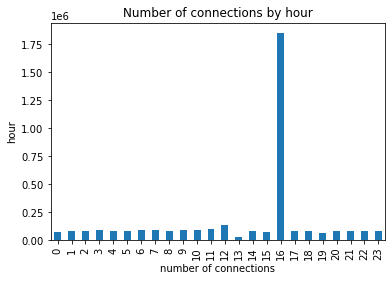

In [14]:
zat_conn_df['hour'].value_counts().sort_index().plot.bar()
plt.title("Number of connections by hour")
plt.xlabel("number of connections")
plt.ylabel("hour")
plt.show()

In [15]:
# We investigate this specific hour 
zat_conn_df[(zat_conn_df['hour'] == 16) & (zat_conn_df['day'] == 22)].describe()

,id.orig_p,id.resp_p,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,hour,day
count,1.848217e+06,1.848217e+06,94126.000000,94126.000000,1.848217e+06,1.848217e+06,1.848217e+06,1.848217e+06,1.848217e+06,1848217.0,1848217.0
mean,2.723299e+04,1.917006e+04,1303.718431,22177.785692,2.524385e+01,2.891495e+00,6.008312e+02,2.920970e+00,2.498304e+03,16.0,22.0
std,2.027027e+04,2.130771e+04,4862.699979,86689.281972,1.433727e+03,1.825428e+01,2.491127e+03,3.202223e+01,4.107846e+04,0.0,0.0
min,1.110000e+02,2.100000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,16.0,22.0
25%,6.881000e+03,8.000000e+01,111.000000,192.000000,0.000000e+00,1.000000e+00,5.200000e+01,0.000000e+00,0.000000e+00,16.0,22.0
50%,2.431800e+04,6.881000e+03,235.000000,756.000000,0.000000e+00,1.000000e+00,5.200000e+01,0.000000e+00,0.000000e+00,16.0,22.0
75%,4.511700e+04,3.612500e+04,474.000000,11561.000000,0.000000e+00,1.000000e+00,1.036000e+03,0.000000e+00,0.000000e+00,16.0,22.0
max,6.553500e+04,6.553500e+04,466853.000000,787448.000000,3.895320e+05,7.000000e+02,9.045180e+05,1.278000e+03,1.641360e+06,16.0,22.0


## Feature Engineering

We want to increase the resolution of our network data by performing feature engineering. This combines cybersecurity domain knowledge with our data to extract meaningful information from specifically the categorical data.

One problem with our data in a production environment is using IPs. As is the case with most, if not all unsupervised clustering or anomaly detection algorithms, categorical data must be encoded. For ordinal categorical data, this is as simple as just label encoding to a numeric value. However, for nominal categorical data, this approach would not work. Instead, we would need to use one-hot encoding which alters the schema to the total N-feature space of that data. For instance, if there were N IP's in our data, our schema would increase by 7 variables in a OHE fashion. For a post-hoc analysis which this is (as we are not receiving any more data), this would technically work, however practically and using test sets, this approach would not work as we may potentially see new IP's not captured by our schema, thus causing our algorithm to lose information or crash if not handled properly. We could potentially only encode the internal private IPs that we may have more control over, however this still would require a new schema every time a IP is added to our administrative zone, something that is again not practical. 

To solve both of these concerns, we will use feature engineering and extract as much information regarding the IP as we can, which would also be the most fitting in a data-enrichment/anomaly detection production scenario. We will capture information such as whether the IP is broadcast, whether it is private or not, etc. In a production environment, it may still be useful to OHE specific, mission-critical servers, but since this was not described in detail for the data, we will not be doing this. 

Similarly, we could also enrich data using API's to get more information about our data from outside sources (such as shodan or censys) however we will not be doing this. 

In [28]:
# how many connections have broadcast as the source IP?
len(zat_conn_df[zat_conn_df['id.orig_h'].str.contains("255")])

0

In [27]:
# how many connections have broadcast as the response IP?
len(zat_conn_df[zat_conn_df['id.resp_h'].str.contains("255")])

60

We encode is_broadcast to a column numerically to include in our anomaly detection analysis

In [32]:
def get_broadcast_resp(row):
    if row['id.resp_h'].contains("255"):
        return 1
    return 0

In [33]:
zat_conn_df["is_broadcast_resp"] = zat_conn_df.apply(lambda row: get_broadcast_resp(row), axis=1)

AttributeError: 'str' object has no attribute 'contains'